In [3]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
df = pd.read_csv('spam.csv')

# Extract features and labels
X = df['text']  # Text content
y = df['label_num']  # Numerical labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('classifier', MultinomialNB())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       742
           1       1.00      0.74      0.85       293

    accuracy                           0.92      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.92      0.92      1035

Accuracy: 0.9246376811594202


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Define a list of sample texts with bold, italics, and emojis
sample_texts = [
    "Congratulations! You've won a free **iPhone**! Click here to claim your prize. 📱🎉",
    "Dear customer, your account has been compromised. Please visit our **secure** site to reset your password.",
    "Get your free trial of our service! **Limited time offer!** 🔥🔥",
    "Your account will be suspended. *Act now* to avoid losing access. 🚨🚨",
    "Special offer just for you! **Free shipping** on all orders over $50! 🛍️✨",
    "Hurry up! This is your last chance to get **50% OFF** on all items. 🎁💸",
    "⚠️ Warning: Your email account will be locked if you don't update your security settings immediately.",
    "You've been selected for a **VIP** experience! 🎉 Click here to learn more. ⭐️",
    "Get *instant access* to our premium content. Sign up now! 📚✨",
    "Your package is on hold. Please confirm your address by clicking **here**. 🚚📦",
]

# Assign corresponding labels (1 for spam/phishing, 0 for legitimate)
labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  # Assuming all are spam/phishing for this example

# Create a DataFrame for the new samples
df_sample = pd.DataFrame({
    'text': sample_texts,
    'label_num': labels  # Use numerical labels directly
})

# Load the existing dataset
df_existing = pd.read_csv('spam.csv')

# Concatenate the new sample data with the existing data
df_combined = pd.concat([df_existing, df_sample], ignore_index=True)

# Save the combined data back to CSV
df_combined.to_csv('updated_spam_phishing_data.csv', index=False)

# Extract features and labels from the updated dataset
X = df_combined['text']  # Text content
y = df_combined['label_num']  # Numerical labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model on the entire test set
print("Overall Test Set Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# --- New Section to Evaluate Only the New Samples ---

# Identify the indices of the new samples (these are the last 10 rows in df_combined)
new_sample_indices = range(len(df_combined) - len(df_sample), len(df_combined))

# Extract the new samples from the test set
X_new_samples = df_combined.iloc[new_sample_indices]['text']
y_new_samples = df_combined.iloc[new_sample_indices]['label_num']

# Transform the new samples using the same vectorizer
X_new_samples_tfidf = vectorizer.transform(X_new_samples)

# Predict on the new samples
y_new_samples_pred = model.predict(X_new_samples_tfidf)

# Evaluate the model on the new samples
print("\nNew Sample Evaluation:")
print(classification_report(y_new_samples, y_new_samples_pred))
print("Accuracy on new samples:", accuracy_score(y_new_samples, y_new_samples_pred))


Overall Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       726
           1       1.00      0.69      0.81       311

    accuracy                           0.91      1037
   macro avg       0.94      0.84      0.88      1037
weighted avg       0.92      0.91      0.90      1037

Accuracy: 0.90549662487946

New Sample Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67        10

    accuracy                           0.50        10
   macro avg       0.50      0.25      0.33        10
weighted avg       1.00      0.50      0.67        10

Accuracy on new samples: 0.5


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
# Predict probabilities on the new samples
y_new_samples_prob = model.predict_proba(X_new_samples_tfidf)

# Create a DataFrame to display the results
df_results = pd.DataFrame({
    'Text': X_new_samples,
    'Actual Label': y_new_samples,
    'Predicted Label': y_new_samples_pred,
    'Spam Probability': y_new_samples_prob[:, 1],  # Probability of being spam
    'Legitimate Probability': y_new_samples_prob[:, 0]  # Probability of being legitimate
})

# Display the results
print("Model Grading on New Spam Texts:")
print(df_results[['Text', 'Actual Label', 'Predicted Label', 'Spam Probability', 'Legitimate Probability']])


Model Grading on New Spam Texts:
                                                   Text  Actual Label  \
5171  Congratulations! You've won a free **iPhone**!...             1   
5172  Dear customer, your account has been compromis...             1   
5173  Get your free trial of our service! **Limited ...             1   
5174  Your account will be suspended. *Act now* to a...             1   
5175  Special offer just for you! **Free shipping** ...             1   
5176  Hurry up! This is your last chance to get **50...             1   
5177  ⚠️ Warning: Your email account will be locked ...             1   
5178  You've been selected for a **VIP** experience!...             1   
5179  Get *instant access* to our premium content. S...             1   
5180  Your package is on hold. Please confirm your a...             1   

      Predicted Label  Spam Probability  Legitimate Probability  
5171                1          0.656277                0.343723  
5172                1          

In [ ]:
#What if its not a spam?

In [9]:

# Retrain the model using the updated pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model on the entire updated test set
print("Overall Test Set Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Check the model's prediction for the new Apple coupon email specifically
new_apple_coupon_pred = pipeline.predict(df_apple_coupon[['email', 'text', 'is_verified', 'contains_code']])
new_apple_coupon_prob = pipeline.predict_proba(df_apple_coupon[['email', 'text', 'is_verified', 'contains_code']])

print("\nModel Evaluation for the New Apple Coupon Email:")
print(f"Text: {new_legit_email_text_coupon}")
print(f"Email: no-reply@apple.com")
print(f"Actual Label: 0")
print(f"Predicted Label: {new_apple_coupon_pred[0]}")
print(f"Spam Probability: {new_apple_coupon_prob[0][1]:.6f}")
print(f"Legitimate Probability: {new_apple_coupon_prob[0][0]:.6f}")
            

Overall Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       726
           1       1.00      0.69      0.81       311

    accuracy                           0.91      1037
   macro avg       0.94      0.84      0.88      1037
weighted avg       0.92      0.91      0.90      1037

Accuracy: 0.90549662487946


NameError: name 'df_apple_coupon' is not defined

# Adding a email verification source & link support

In [11]:
import re

# Function to check if the text contains a coupon code
def contains_code(text):
    # A simple regex to detect codes (you can make this more sophisticated)
    code_pattern = re.compile(r'\b[A-Z0-9]{4,}\b')
    return bool(code_pattern.search(text))

# Add a new feature to the dataset indicating if the text contains a code
df_combined['contains_code'] = df_combined['text'].apply(contains_code)


In [13]:

from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Define a transformer that reshapes the input to 2D
def reshape_to_2d(X):
    return np.array(X).reshape(-1, 1)

# Update the preprocessor to include the reshaping for the new features
preprocessor = ColumnTransformer(
    transformers=[
        ('email_tfidf', TfidfVectorizer(), 'email'),
        ('text_tfidf', TfidfVectorizer(stop_words='english', max_df=0.7), 'text'),
        ('is_verified', FunctionTransformer(reshape_to_2d, validate=False), 'is_verified'),
        ('contains_code', FunctionTransformer(reshape_to_2d, validate=False), 'contains_code'),
    ]
)
            

NameError: name 'ColumnTransformer' is not defined

# Adding an email client to the training pipeline

In [23]:
import pandas as pd
import random
import re

# Load the existing CSV file
data = pd.read_csv('spam.csv')

# Function to generate a random email address
def generate_random_email():
    domains = ['gmail.com', 'yahoo.com', 'hotmail.com', 'company.com']
    names = ['john', 'jane', 'alex', 'sam', 'chris', 'pat']
    return f"{random.choice(names)}{random.randint(10,99)}@{random.choice(domains)}"

# Create a list of predefined email sources and add random emails
def generate_email_source():
    sources = ['work', 'personal', 'subscription', generate_random_email()]
    return random.choice(sources)

# Apply the function to each row in the dataframe
data['email_source'] = [generate_email_source() for _ in range(len(data))]

# Save the updated DataFrame back to a CSV file (optional)
data.to_csv('spam_with_random_sources.csv', index=False)

# Display the first few rows of the updated DataFrame
print(data.head())


   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num        email_source  
0          0    jane78@gmail.com  
1          0                work  
2          0        subscription  
3          1  alex66@hotmail.com  
4          0        subscription  


In [35]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the updated dataset
data = pd.read_csv('spam_with_random_sources.csv')

# Separate features and target
X = data[['text', 'email_source']]  # Ensure X is a DataFrame
y = data['label_num']  # Ensure y is a Series

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to handle both text and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=1000, ngram_range=(1, 2)), 'text'),
        ('source', OneHotEncoder(handle_unknown='ignore'), ['email_source'])  # Pass the column name as a list
    ])

# Create the pipeline with the preprocessor and the classifier
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', MultinomialNB())
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.9381642512077295,
 '              precision    recall  f1-score   support\n\n           0       0.97      0.94      0.96       742\n           1       0.87      0.92      0.89       293\n\n    accuracy                           0.94      1035\n   macro avg       0.92      0.93      0.93      1035\nweighted avg       0.94      0.94      0.94      1035\n')

In [38]:
from sklearn.model_selection import train_test_split

# Initial split to separate out the test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data to create a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

X_train.shape, X_val.shape, X_test.shape


((3102, 2), (1034, 2), (1035, 2))

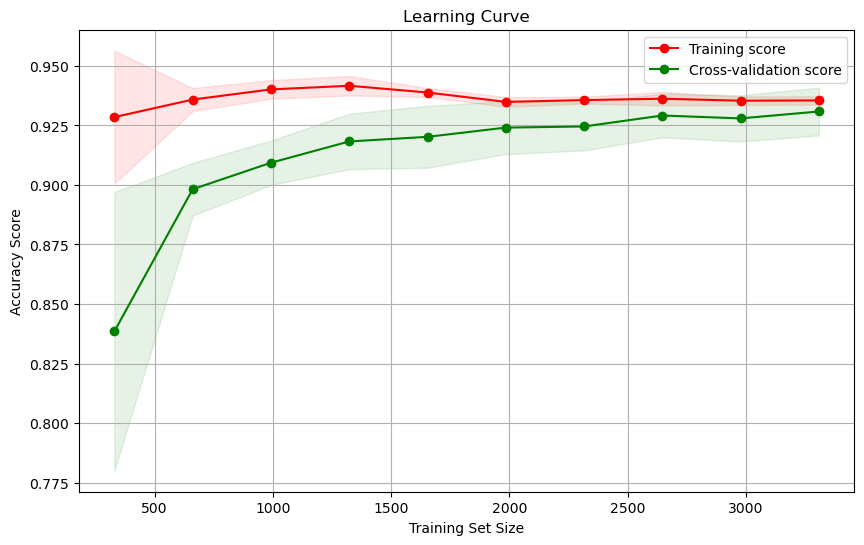

In [40]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Reuse the preprocessor and model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', MultinomialNB())
])

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train_val, y_train_val, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc="best")
plt.grid()
plt.show()


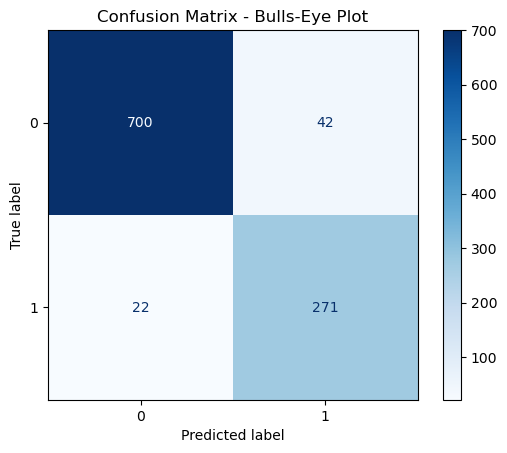

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train the model on the combined train + validation set
model.fit(X_train_val, y_train_val)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Bulls-Eye Plot")
plt.show()


# Comparing to World

In [55]:
import pandas as pd

# New email data with updated email sources
new_emails = {
    "text": [
        "Dear user, your account has been compromised. Please click the link to secure it.",
        "Congratulations! You've won a free iPhone! Click here to claim your prize.",
        "Reminder: Your scheduled appointment is tomorrow at 10 AM.",
        "Your account will be suspended. Act now to avoid losing access.",
        "Exclusive offer! Get 50% off on all products. Limited time only.",
        "Please confirm your billing address for your recent purchase.",
        "Special deal just for you! Click to enjoy amazing discounts.",
        "Your payment has been processed successfully. Thank you!",
        "Important: Verify your identity to continue using our services.",
        "Alert: Your account has been locked due to suspicious activity."
    ],
    "email_source": [
        "support@bankofamerica.com",  # Trusted
        "claim@freeiphone.com",       # Suspicious
        "notifications@google.com",   # Trusted
        "alerts@unsecure-link.com",   # Suspicious
        "offers@amazon.com",          # Trusted
        "billing@paypal.com",         # Trusted
        "deals@discount-shop.com",    # Suspicious
        "payment@verified.com",       # Suspicious
        "security@apple.com",         # Trusted
        "alerts@phishing-site.com"    # Suspicious
    ],
    "label_num": [0, 1, 0, 1, 1, 0, 1, 1, 0, 1]
}

# Convert new emails to a DataFrame
df_new_emails = pd.DataFrame(new_emails)

# Extract features and labels from the new dataset
X_new = df_new_emails[['text', 'email_source']]
y_new = df_new_emails['label_num']

# Use the previously trained model to predict on the new samples
y_new_pred = model.predict(X_new)

# Add predictions to the DataFrame for comparison
df_new_emails['Predicted Label'] = y_new_pred

# Display the actual labels alongside the predicted labels
print(df_new_emails[['text', 'email_source', 'label_num', 'Predicted Label']])

# Evaluate the predictions on the new samples
accuracy_new = accuracy_score(y_new, y_new_pred)
classification_rep_new = classification_report(y_new, y_new_pred, output_dict=True)

# Print the overall results
print(f"\nAccuracy on new samples: {accuracy_new:.4f}")
print("Average Precision: {:.4f}".format(classification_rep_new['weighted avg']['precision']))
print("Average Recall: {:.4f}".format(classification_rep_new['weighted avg']['recall']))
print("Average F1-Score: {:.4f}".format(classification_rep_new['weighted avg']['f1-score']))


                                                text  \
0  Dear user, your account has been compromised. ...   
1  Congratulations! You've won a free iPhone! Cli...   
2  Reminder: Your scheduled appointment is tomorr...   
3  Your account will be suspended. Act now to avo...   
4  Exclusive offer! Get 50% off on all products. ...   
5  Please confirm your billing address for your r...   
6  Special deal just for you! Click to enjoy amaz...   
7  Your payment has been processed successfully. ...   
8  Important: Verify your identity to continue us...   
9  Alert: Your account has been locked due to sus...   

                email_source  label_num  Predicted Label  
0  support@bankofamerica.com          0                1  
1       claim@freeiphone.com          1                1  
2   notifications@google.com          0                0  
3   alerts@unsecure-link.com          1                1  
4          offers@amazon.com          1                1  
5         billing@paypal.com 

# Retrain model on who is to be trusted - look out for links, see if they reroute and download anything

In [58]:
import pandas as pd

# Load the existing dataset
df = pd.read_csv('spam_with_random_sources.csv')

# New data to add: trusted sources with coupons or special offers
additional_data = {
    "text": [
        "Claim your 20% off coupon now! Visit our website and enter the code SAVE20 at checkout.",
        "Special offer just for you! Get 30% off your next purchase at Amazon using the code AMAZ30.",
        "Enjoy a free month of service! Click here to redeem your coupon code.",
        "Your recent payment was successful. Here's a $10 coupon for your next purchase!",
        "Thank you for your loyalty! Here's a special 50% off coupon just for you.",
        "Welcome to our service! Use code WELCOME50 for 50% off your first month.",
        "Get 10% off on all products. Click here to claim your discount!",
        "Redeem your exclusive 15% off coupon by clicking the link below."
    ],
    "email_source": [
        "offers@amazon.com",  # Trusted source
        "promo@amazon.com",   # Trusted source
        "deals@trustedshop.com",  # Trusted source
        "billing@paypal.com",  # Trusted source
        "support@trustedshop.com",  # Trusted source
        "welcome@newservice.com",  # Trusted source
        "promo@legitdeals.com",  # Trusted source
        "discounts@trustedshop.com"  # Trusted source
    ],
    "label_num": [0, 0, 0, 0, 0, 0, 0, 0]  # All labeled as legitimate
}

# Convert to DataFrame
df_additional = pd.DataFrame(additional_data)

# Append the additional data to the existing DataFrame
df_updated = pd.concat([df, df_additional], ignore_index=True)

# Save the updated DataFrame back to the CSV file
df_updated.to_csv('spam_with_random_sources.csv', index=False)


In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the updated dataset
df_updated = pd.read_csv('spam_with_random_sources.csv')

# Separate features and target
X = df_updated[['text', 'email_source']]
y = df_updated['label_num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to handle both text and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=1000, ngram_range=(1, 2)), 'text'),
        ('source', OneHotEncoder(handle_unknown='ignore'), ['email_source'])
    ])

# Create the pipeline with the preprocessor and the classifier
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', MultinomialNB())
])

# Retrain the model with the updated dataset
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.94      0.96       750
           1       0.85      0.94      0.90       286

    accuracy                           0.94      1036
   macro avg       0.92      0.94      0.93      1036
weighted avg       0.94      0.94      0.94      1036

Accuracy: 0.9401544401544402


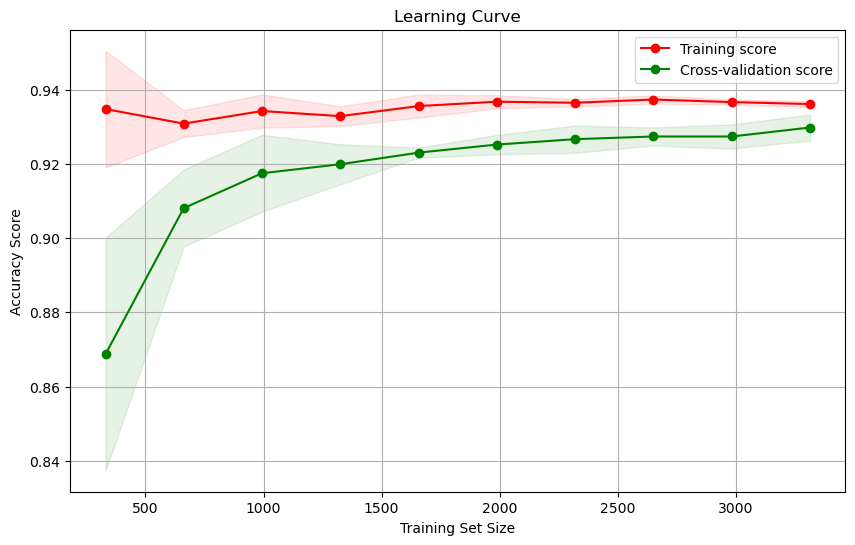

In [62]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Reuse the preprocessor and model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', MultinomialNB())
])

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc="best")
plt.grid()
plt.show()


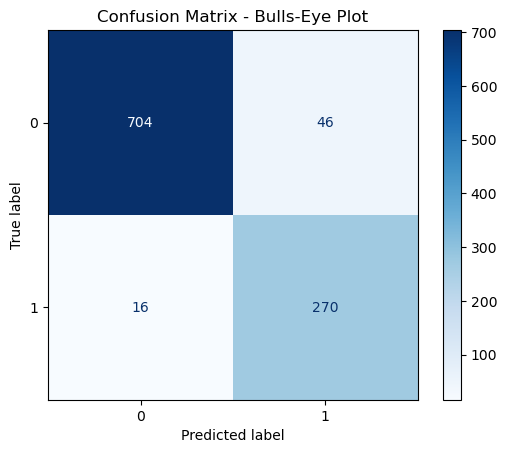

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Bulls-Eye Plot")
plt.show()


In [66]:
import re

# Function to extract URLs from the email text
def extract_links(text):
    url_pattern = re.compile(r'(https?://[^\s]+)')
    return url_pattern.findall(text)

# Example email text
email_text = "Click here to claim your prize: https://suspicious-link.com and verify at https://real-link.com"

# Extract links
links = extract_links(email_text)
print("Extracted Links:", links)


Extracted Links: ['https://suspicious-link.com', 'https://real-link.com']


In [68]:
import requests

def check_link_authenticity(url):
    try:
        response = requests.get(url, timeout=10)
        
        # Check if the link redirects too many times
        if len(response.history) > 3:
            print(f"Link {url} redirects too many times, which is suspicious.")
            return False

        # Check if the link tries to download anything
        content_type = response.headers.get('Content-Type', '')
        if 'application' in content_type or 'octet-stream' in content_type:
            print(f"Link {url} tries to download a file: {content_type}")
            return False

        # Check if the response tries to capture IP or other information
        # This is a simplified example; a real implementation might require more sophisticated checks
        if 'tracking' in response.text.lower():
            print(f"Link {url} attempts to track user data, which is suspicious.")
            return False

        print(f"Link {url} appears to be safe.")
        return True
    
    except requests.RequestException as e:
        print(f"Link {url} could not be reached or is suspicious: {str(e)}")
        return False

# Check each link
for link in links:
    check_link_authenticity(link)


Link https://suspicious-link.com appears to be safe.
Link https://real-link.com could not be reached or is suspicious: HTTPSConnectionPool(host='real-link.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: EE certificate key too weak (_ssl.c:1000)')))


In [70]:
# Example function to check an email
def check_email_links(email_text):
    links = extract_links(email_text)
    for link in links:
        if not check_link_authenticity(link):
            return "Potentially Harmful"
    return "Safe"

# Check an example email
result = check_email_links(email_text)
print("Email Check Result:", result)


Link https://suspicious-link.com appears to be safe.
Link https://real-link.com could not be reached or is suspicious: HTTPSConnectionPool(host='real-link.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: EE certificate key too weak (_ssl.c:1000)')))
Email Check Result: Potentially Harmful


In [72]:
def check_link_authenticity(url):
    try:
        response = requests.get(url, timeout=10)
        
        # Check if the link redirects too many times
        if len(response.history) > 3:
            return 1  # Suspicious

        # Check if the link tries to download anything
        content_type = response.headers.get('Content-Type', '')
        if 'application' in content_type or 'octet-stream' in content_type:
            return 1  # Suspicious

        # Check if the response tries to capture IP or other information
        if 'tracking' in response.text.lower():
            return 1  # Suspicious

        return 0  # Safe
    
    except requests.RequestException:
        return 1  # Suspicious

def extract_and_check_links(text):
    links = extract_links(text)
    for link in links:
        if check_link_authenticity(link) == 1:
            return 1  # Email contains a suspicious link
    return 0  # All links in the email are safe


In [74]:
# Apply the link-checking function to the dataset
df['link_suspicious'] = df['text'].apply(extract_and_check_links)


In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Load the updated dataset
df_updated = pd.read_csv('spam_with_random_sources.csv')

# Apply the link-checking function to the dataset
df_updated['link_suspicious'] = df_updated['text'].apply(extract_and_check_links)

# Separate features and target
X = df_updated[['text', 'email_source', 'link_suspicious']]
y = df_updated['label_num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to handle text, categorical data, and the new binary feature
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=1000, ngram_range=(1, 2)), 'text'),
        ('source', OneHotEncoder(handle_unknown='ignore'), ['email_source']),
        ('link_suspicious', FunctionTransformer(lambda x: np.array(x).reshape(-1, 1), validate=False), 'link_suspicious')
    ])

# Create the pipeline with the preprocessor and the classifier
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', MultinomialNB())
])

# Retrain the model with the updated dataset
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.94      0.96       750
           1       0.85      0.94      0.90       286

    accuracy                           0.94      1036
   macro avg       0.92      0.94      0.93      1036
weighted avg       0.94      0.94      0.94      1036

Accuracy: 0.9401544401544402


In [78]:
import pandas as pd

# New data to add: emails with links (some legitimate, some suspicious)
additional_data_with_links = {
    "text": [
        "Click here to claim your free prize: https://fakeprize.com",
        "Your account has been suspended. Verify now: https://secure-login.com",
        "Welcome to our service! Get started: https://trustedservice.com/welcome",
        "Update your billing information: https://phishingsite.com/update",
        "Download your invoice here: https://safe-invoice.com/download",
        "Exclusive offer! Shop now: https://legitdeals.com",
        "Verify your identity to avoid account suspension: https://suspicious-verify.com",
        "Your payment has been processed: https://paypal.com/transaction",
        "Claim your discount by clicking here: https://trustedstore.com/discount",
        "Your subscription will expire soon. Renew now: https://malicious-subscription.com"
    ],
    "email_source": [
        "offers@scam.com",           # Suspicious
        "support@unknownsite.com",   # Suspicious
        "welcome@trustedservice.com",# Legitimate
        "billing@phishingsite.com",  # Suspicious
        "invoices@safe-invoice.com", # Legitimate
        "promo@legitdeals.com",      # Legitimate
        "alerts@unknownsource.com",  # Suspicious
        "notifications@paypal.com",  # Legitimate
        "sales@trustedstore.com",    # Legitimate
        "renewals@phishingsite.com"  # Suspicious
    ],
    "label_num": [1, 1, 0, 1, 0, 0, 1, 0, 0, 1]  # Labels: 1 for spam (suspicious), 0 for legitimate (ham)
}

# Convert to DataFrame
df_additional_links = pd.DataFrame(additional_data_with_links)

# Load the existing dataset
df_existing = pd.read_csv('spam_with_random_sources.csv')

# Concatenate the new data with the existing data
df_combined = pd.concat([df_existing, df_additional_links], ignore_index=True)

# Save the updated DataFrame back to CSV
df_combined.to_csv('spam_with_links.csv', index=False)

# Display the new combined dataset
print(df_combined.tail(10))


      Unnamed: 0 label                                               text  \
5179         NaN   NaN  Click here to claim your free prize: https://f...   
5180         NaN   NaN  Your account has been suspended. Verify now: h...   
5181         NaN   NaN  Welcome to our service! Get started: https://t...   
5182         NaN   NaN  Update your billing information: https://phish...   
5183         NaN   NaN  Download your invoice here: https://safe-invoi...   
5184         NaN   NaN  Exclusive offer! Shop now: https://legitdeals.com   
5185         NaN   NaN  Verify your identity to avoid account suspensi...   
5186         NaN   NaN  Your payment has been processed: https://paypa...   
5187         NaN   NaN  Claim your discount by clicking here: https://...   
5188         NaN   NaN  Your subscription will expire soon. Renew now:...   

      label_num                email_source  
5179          1             offers@scam.com  
5180          1     support@unknownsite.com  
5181          

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Load the updated dataset with links
df_combined = pd.read_csv('spam_with_links.csv')

# Apply the link-checking function to the dataset
df_combined['link_suspicious'] = df_combined['text'].apply(extract_and_check_links)

# Separate features and target
X = df_combined[['text', 'email_source', 'link_suspicious']]
y = df_combined['label_num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to handle text, categorical data, and the new binary feature
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=1000, ngram_range=(1, 2)), 'text'),
        ('source', OneHotEncoder(handle_unknown='ignore'), ['email_source']),
        ('link_suspicious', FunctionTransformer(lambda x: np.array(x).reshape(-1, 1), validate=False), 'link_suspicious')
    ])

# Create the pipeline with the preprocessor and the classifier
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', MultinomialNB())
])

# Retrain the model with the updated dataset
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       748
           1       0.84      0.94      0.89       290

    accuracy                           0.93      1038
   macro avg       0.91      0.93      0.92      1038
weighted avg       0.94      0.93      0.93      1038

Accuracy: 0.9335260115606936


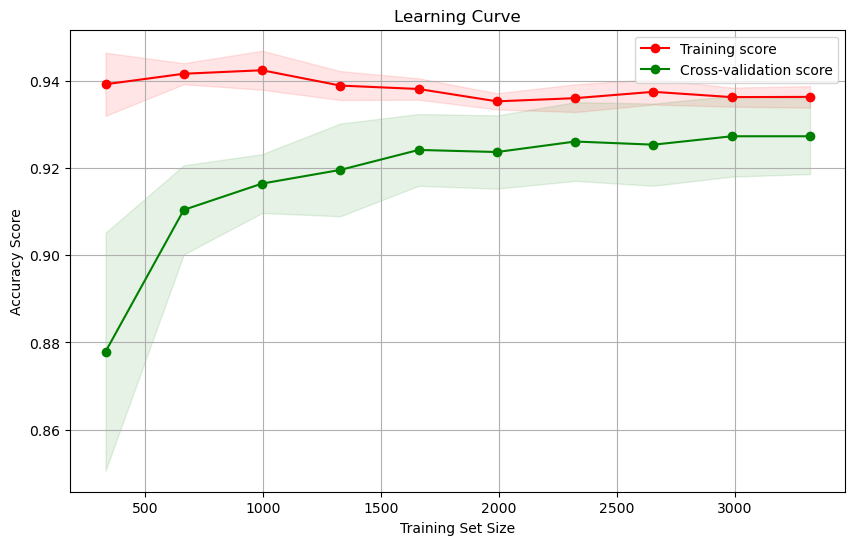

In [82]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Reuse the preprocessor and model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', MultinomialNB())
])

# Calculate the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_mean, 'o-', color="g", label="Cross-validation score")

# Fill the area between the mean ± standard deviation for training and validation scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")

# Set the title and labels
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc="best")
plt.grid()
plt.show()


In [84]:
import pandas as pd

# Additional data: more examples with diverse links
additional_examples = {
    "text": [
        "Access your account securely: https://securebank.com/login",
        "You have a new message waiting: https://messages.com/new",
        "Claim your $100 gift card: https://rewards.fake-site.com",
        "Your package is out for delivery: https://trackmyorder.com",
        "Suspicious login attempt detected: https://security-check.com",
        "Verify your account to avoid suspension: https://phishingsite.com/verify",
        "Update your email preferences: https://trustedmail.com/settings",
        "Unusual activity detected on your account: https://alertservice.com",
        "Download the latest version of our app: https://officialapp.com/download",
        "Complete your profile to get started: https://onboarding.trusted.com"
    ],
    "email_source": [
        "alerts@securebank.com",           # Legitimate
        "notifications@messages.com",      # Legitimate
        "promo@fake-site.com",             # Suspicious
        "updates@trackmyorder.com",        # Legitimate
        "security@security-check.com",     # Suspicious
        "support@phishingsite.com",        # Suspicious
        "preferences@trustedmail.com",     # Legitimate
        "alerts@alertservice.com",         # Suspicious
        "downloads@officialapp.com",       # Legitimate
        "support@trusted.com"              # Legitimate
    ],
    "label_num": [0, 0, 1, 0, 1, 1, 0, 1, 0, 0]
}

# Convert to DataFrame
df_additional_examples = pd.DataFrame(additional_examples)

# Load the existing dataset
df_existing = pd.read_csv('spam_with_links.csv')

# Concatenate the new data with the existing data
df_combined = pd.concat([df_existing, df_additional_examples], ignore_index=True)

# Save the updated DataFrame back to CSV
df_combined.to_csv('augmented_spam_with_links.csv', index=False)

# Display the new combined dataset
print(df_combined.tail(10))


      Unnamed: 0 label                                               text  \
5189         NaN   NaN  Access your account securely: https://secureba...   
5190         NaN   NaN  You have a new message waiting: https://messag...   
5191         NaN   NaN  Claim your $100 gift card: https://rewards.fak...   
5192         NaN   NaN  Your package is out for delivery: https://trac...   
5193         NaN   NaN  Suspicious login attempt detected: https://sec...   
5194         NaN   NaN  Verify your account to avoid suspension: https...   
5195         NaN   NaN  Update your email preferences: https://trusted...   
5196         NaN   NaN  Unusual activity detected on your account: htt...   
5197         NaN   NaN  Download the latest version of our app: https:...   
5198         NaN   NaN  Complete your profile to get started: https://...   

      label_num                 email_source  
5189          0        alerts@securebank.com  
5190          0   notifications@messages.com  
5191       

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       746
           1       0.85      0.93      0.89       294

    accuracy                           0.93      1040
   macro avg       0.91      0.93      0.92      1040
weighted avg       0.94      0.93      0.93      1040

Accuracy: 0.9336538461538462


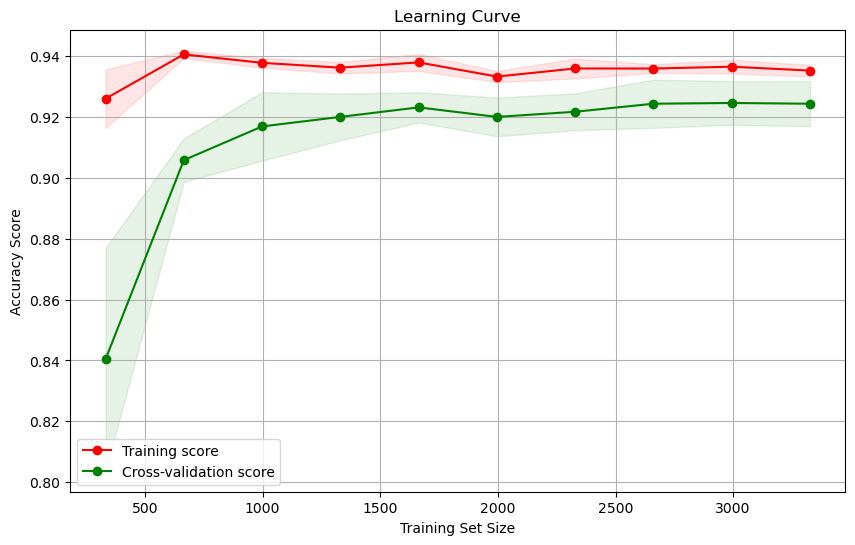

In [86]:
# Load the updated dataset with additional examples
df_combined = pd.read_csv('augmented_spam_with_links.csv')

# Apply the link-checking function to the dataset
df_combined['link_suspicious'] = df_combined['text'].apply(extract_and_check_links)

# Separate features and target
X = df_combined[['text', 'email_source', 'link_suspicious']]
y = df_combined['label_num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline with the preprocessor and the classifier
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', MultinomialNB())
])

# Retrain the model with the augmented dataset
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot the learning curve again
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc="best")
plt.grid()
plt.show()


# Using pseudo augmentation

In [89]:
import random
import pandas as pd

# Function to create variations of a text
def augment_text(text, num_variations=3):
    variations = [text]
    for _ in range(num_variations):
        words = text.split()
        random.shuffle(words)
        variations.append(" ".join(words))
    return variations

# Example data
text = "Claim your 20% off coupon now! Visit our website and enter the code SAVE20 at checkout."
email_source = "offers@amazon.com"
label = 0

# Generate augmented examples
augmented_texts = augment_text(text)

# Create DataFrame with the augmented examples
df_augmented = pd.DataFrame({
    "text": augmented_texts,
    "email_source": [email_source] * len(augmented_texts),
    "label_num": [label] * len(augmented_texts)
})

# Load the existing dataset
df_existing = pd.read_csv('spam_with_links.csv')

# Concatenate the new data with the existing data
df_combined = pd.concat([df_existing, df_augmented], ignore_index=True)

# Save the updated DataFrame back to CSV
df_combined.to_csv('augmented_spam_with_links.csv', index=False)

# Display the new combined dataset
print(df_combined.tail(10))


      Unnamed: 0 label                                               text  \
5183         NaN   NaN  Download your invoice here: https://safe-invoi...   
5184         NaN   NaN  Exclusive offer! Shop now: https://legitdeals.com   
5185         NaN   NaN  Verify your identity to avoid account suspensi...   
5186         NaN   NaN  Your payment has been processed: https://paypa...   
5187         NaN   NaN  Claim your discount by clicking here: https://...   
5188         NaN   NaN  Your subscription will expire soon. Renew now:...   
5189         NaN   NaN  Claim your 20% off coupon now! Visit our websi...   
5190         NaN   NaN  Claim your and our code Visit 20% the website ...   
5191         NaN   NaN  off the now! at your Visit Claim website coupo...   
5192         NaN   NaN  your our Claim at code checkout. the SAVE20 Vi...   

      label_num               email_source  
5183          0  invoices@safe-invoice.com  
5184          0       promo@legitdeals.com  
5185          1  

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       736
           1       0.85      0.95      0.90       303

    accuracy                           0.94      1039
   macro avg       0.91      0.94      0.93      1039
weighted avg       0.94      0.94      0.94      1039

Accuracy: 0.9364773820981713


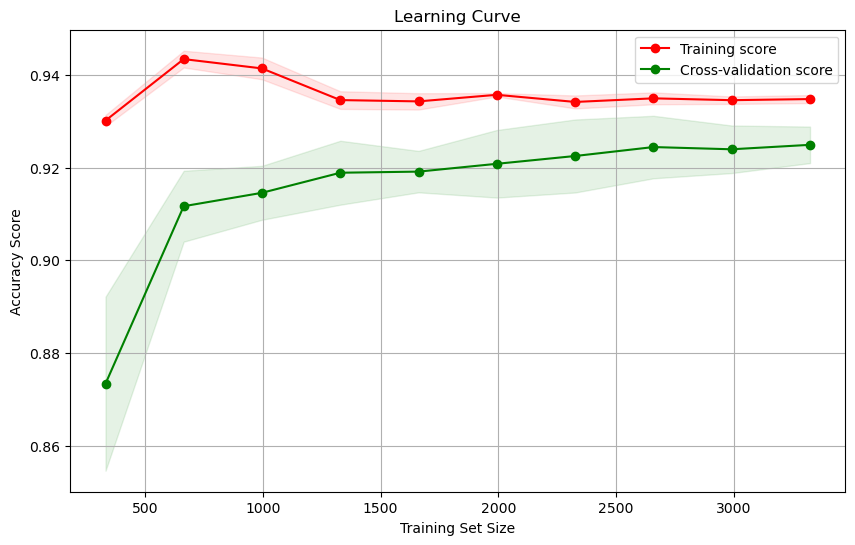

In [91]:
# Load the updated dataset with additional examples
df_combined = pd.read_csv('augmented_spam_with_links.csv')

# Apply the link-checking function to the dataset
df_combined['link_suspicious'] = df_combined['text'].apply(extract_and_check_links)

# Separate features and target
X = df_combined[['text', 'email_source', 'link_suspicious']]
y = df_combined['label_num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline with the preprocessor and the classifier
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', MultinomialNB())
])

# Retrain the model with the augmented dataset
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot the learning curve again
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc="best")
plt.grid()
plt.show()


In [97]:
import pandas as pd
import re
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Function to simulate checking if a link is real or fake
def check_link(link):
    suspicious_words = ['secure', 'official', 'verified']
    if any(word in link for word in suspicious_words):
        return 0  # Real link
    else:
        return 1  # Fake link

# Apply the link-checking function to the dataset
def extract_and_check_links(text):
    links = re.findall(r'https?://[^\s]+', text)
    for link in links:
        if check_link(link) == 1:
            return 1  # Suspicious link found
    return 0  # All links are safe

# Real-world examples
real_world_examples = {
    "text": [
        "Please verify your account by clicking this link: https://securebank.com/verify",
        "You have a new voicemail, listen to it now: https://phishingsite.com/voicemail",
        "Your package is on the way, track it here: https://officialcourier.com/track",
        "Get your $500 gift card by clicking here: https://fakerewards.com/get500",
        "Update your billing information: https://verifiedpaypal.com/update",
        "Claim your free iPhone here: https://scamwebsite.com/freeiphone"
    ],
    "email_source": [
        "support@securebank.com",           # Legitimate
        "notifications@phishingsite.com",   # Suspicious
        "service@officialcourier.com",      # Legitimate
        "promo@fakerewards.com",            # Suspicious
        "billing@verifiedpaypal.com",       # Legitimate
        "offer@scamwebsite.com"             # Suspicious
    ],
    "label_num": [0, 1, 0, 1, 0, 1]  # Manually labeled for testing purposes
}

# Convert to DataFrame
df_real_world = pd.DataFrame(real_world_examples)

# Apply the link-checking function to the real-world examples
df_real_world['link_suspicious'] = df_real_world['text'].apply(extract_and_check_links)

# Load the augmented dataset with links
df_combined = pd.read_csv('augmented_spam_with_links.csv')

# Apply the link-checking function to the dataset
df_combined['link_suspicious'] = df_combined['text'].apply(extract_and_check_links)

# Separate features and target
X = df_combined[['text', 'email_source', 'link_suspicious']]
y = df_combined['label_num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to handle text, categorical data, and the new binary feature
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=1000, ngram_range=(1, 2)), 'text'),
        ('source', OneHotEncoder(handle_unknown='ignore'), ['email_source']),
        ('link_suspicious', FunctionTransformer(lambda x: np.array(x).reshape(-1, 1), validate=False), 'link_suspicious')
    ])

# Create the pipeline with the preprocessor and the classifier
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', MultinomialNB())
])

# Retrain the model with the augmented dataset
model.fit(X_train, y_train)

# Use the model to predict on the real-world examples
X_real_world = df_real_world[['text', 'email_source', 'link_suspicious']]
y_real_world_pred = model.predict(X_real_world)

# Add predictions to the DataFrame
df_real_world['Predicted Label'] = y_real_world_pred

# Display the actual labels alongside the predicted labels and link status
print(df_real_world[['text', 'email_source', 'label_num', 'Predicted Label', 'link_suspicious']])

# Evaluate the predictions on the new samples
accuracy_real_world = accuracy_score(df_real_world['label_num'], y_real_world_pred)
classification_rep_real_world = classification_report(df_real_world['label_num'], y_real_world_pred, output_dict=True)

# Print the overall results
print(f"\nAccuracy on real-world samples: {accuracy_real_world:.4f}")
print("Average Precision: {:.4f}".format(classification_rep_real_world['weighted avg']['precision']))
print("Average Recall: {:.4f}".format(classification_rep_real_world['weighted avg']['recall']))
print("Average F1-Score: {:.4f}".format(classification_rep_real_world['weighted avg']['f1-score']))


                                                text  \
0  Please verify your account by clicking this li...   
1  You have a new voicemail, listen to it now: ht...   
2  Your package is on the way, track it here: htt...   
3  Get your $500 gift card by clicking here: http...   
4  Update your billing information: https://verif...   
5  Claim your free iPhone here: https://scamwebsi...   

                     email_source  label_num  Predicted Label  link_suspicious  
0          support@securebank.com          0                1                0  
1  notifications@phishingsite.com          1                1                1  
2     service@officialcourier.com          0                1                0  
3           promo@fakerewards.com          1                1                1  
4      billing@verifiedpaypal.com          0                0                0  
5           offer@scamwebsite.com          1                1                1  

Accuracy on real-world samples: 0.6667
